In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data/ECOMM DATA.xlsx - Orders.csv


# **Importing Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/sales-data/ECOMM DATA.xlsx - Orders.csv')

# **Data Audit**

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/7/2012,31/7/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28/1/2013,30/1/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5/11/2013,6/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,19/6/2014,19/6/2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20/6/2014,24/6/2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,2/12/2013,2/12/2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18/2/2012,22/2/2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,22/5/2012,26/5/2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [6]:
df.shape

(51290, 24)

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [10]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

**Outliers**

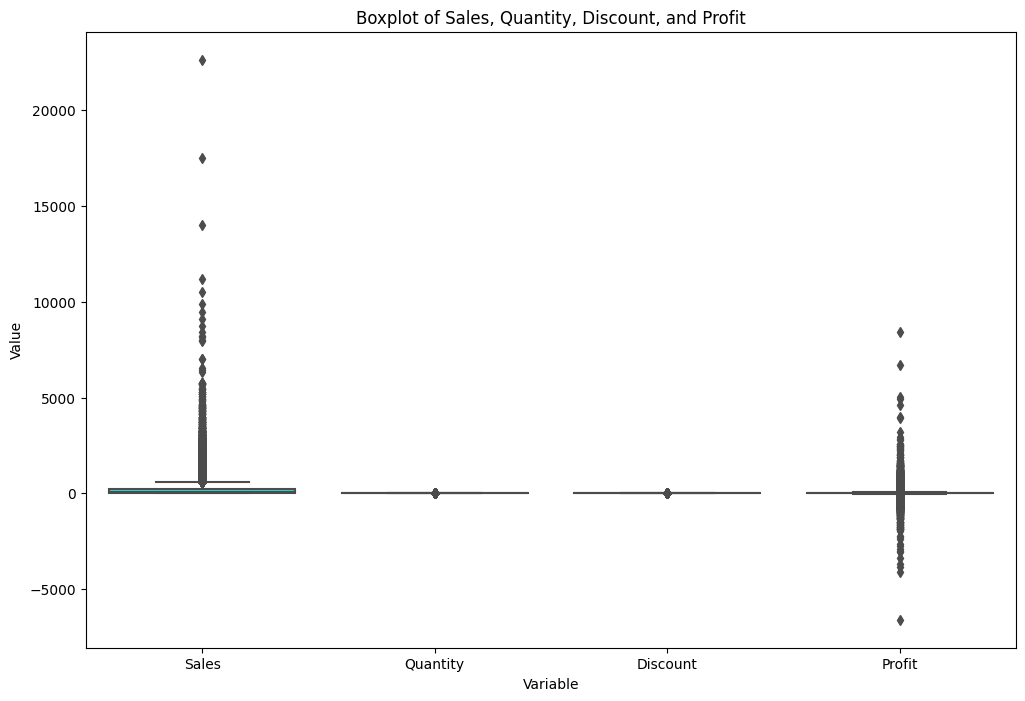

In [58]:
# Selecting the columns where finding outlier is necessary
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']

# Reshaping the data from wide to long format
df_melted = pd.melt(df, value_vars=numerical_columns)

#Creating the Boxplot
custom_palette = {'Sales':'#00FFFF', 
                  'Quantity':'#89CFF0',
                  'Discount':'#0096FF',
                  'Profit':'#0000FF'}
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted , palette=custom_palette)
plt.title('Boxplot of Sales, Quantity, Discount, and Profit')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

# **Exploratory Data Analysis**

In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

/tmp/ipykernel_33/3072535395.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [12]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

/tmp/ipykernel_33/3346622317.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [13]:
df['Order Date'].min()

Timestamp('2011-01-01 00:00:00')

In [14]:
df['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

**Overall Sales Trend**

In [16]:
#Getting month and year from the dataset
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [24]:
#Grouping month year
df_trend = df.groupby('month_year')['Sales'].sum().reset_index()

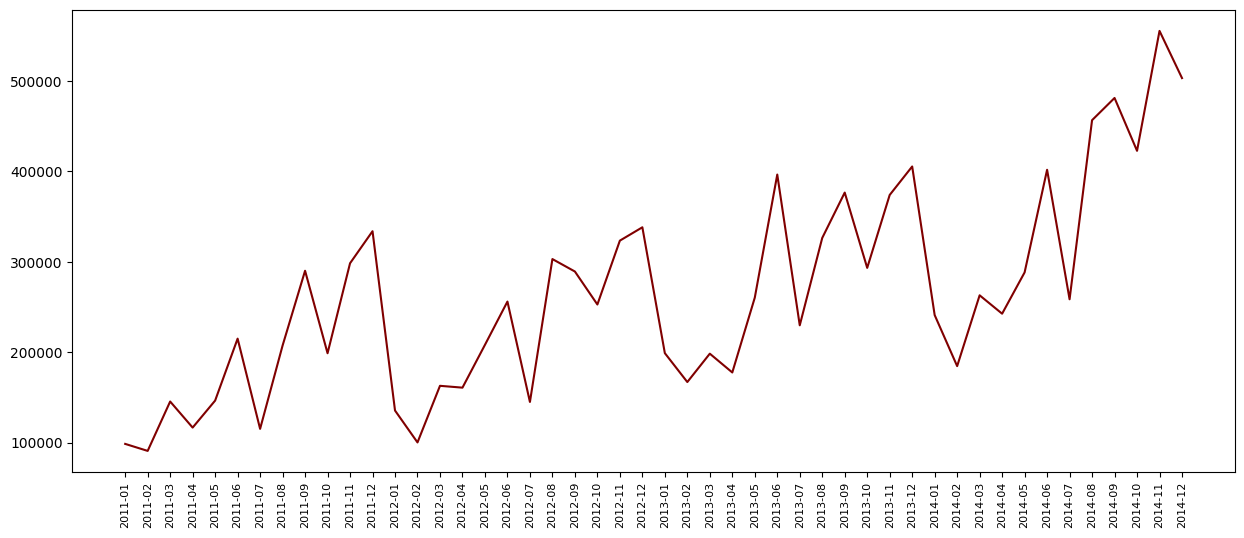

In [29]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'],df_trend['Sales'], color='#800000')
plt.xticks(rotation='vertical',size=8)
plt.show()

**Top 10 highest selling products**

In [41]:
#Groupig product name
prod_sales = pd.DataFrame(df.groupby('Product Name')['Sales'].sum().reset_index())

#Sorting Values
prod_sales = prod_sales.sort_values('Sales', ascending=False)

#Top 10 products by sales
prod_sales[:10]


,Product Name,Sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


**Most Selling Products**

In [44]:
# Grouping Product name
most_selling_prod = pd.DataFrame(df.groupby('Product Name')['Quantity'].sum().reset_index())

#sorting values
most_selling_prod.sort_values(by=['Quantity'], inplace=True, ascending=False)

#Top 10 most selling product
most_selling_prod[:10]

,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


**Most Preferred Shipping Mode**

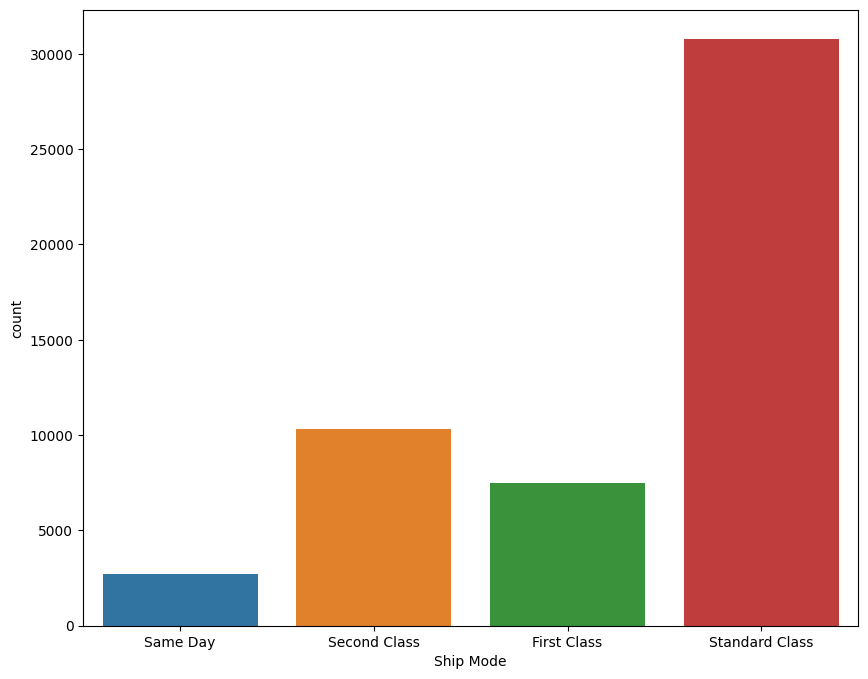

In [46]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Ship Mode', data=df)

# Display the figure
plt.show()

**MOST PROFITABLE CATEGORY AND SUB-CATEGORY?**

In [50]:
cat_subcat = pd.DataFrame(df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index())

In [52]:
# Sorting the values
cat_subcat.sort_values(['Category','Profit'], ascending=False)

,Category,Sub-Category,Profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630


# **Story Telling**

**Introduction**
Our goal is to analyze a dataset containing various sales-related metrics, 
identify outliers, and understand their implications.Following are the 
important attribute or the key-metrices to be focused on.

* Sales: The revenue generated from each order.
* Quantity: The number of items sold in each order.
* Discount: The discount applied to each order.
* Profit: The profit earned from each order.
* Ship Mode: The mode of shipping chosen for each order.

**Insights Gained**

During the analysis it was observed that during the first 3 months of 
every year the sales were low but increased gradually.Following are 
some of the business stratergies for the situation that would help 
to boost sales during these slower months.

**1.Seasonal Promotions and Discounts**
* New Year Sales: Kick off the year with attractive discounts and 
  promotions to draw in customers who are looking to spend after the
  holiday season.
* Winter Clearance: Offer discounts on winter merchandise to clear 
  out inventory and make room for new stock.

**2. Loyalty Programs**
* Exclusive Offers for Loyal Customers: Introduce special deals and 
  discounts for loyal customers to encourage repeat purchases during the
  slower months.

It was observed that most preferred shipping mode amongst the customer is 
Standard Class and the least preferred one is the delivery at Same Day help 
tailor marketing and operational strategies.(This might be beacuse it may 
require the delivery charges for faster delivery.)


Also most selling top 10 products were observed to be a stationary product

The top 10 highest selling product by sales were mostly the electronic items

Lastly it was identified that the Profitable Categories include:
* Technologies
* Office Supplies
* Furniture

